# Doctor_Fees_Prediction


In [2]:
#Importing the packages pandas,Numpy,SeaBorn,matplotlib,math and Numpy 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag

%matplotlib inline

In [3]:
# Importing Dataset
dt=pd.read_excel('C:/Users/Suraj/Jupyter Projects/Project 13_Doctor_Fees_Consultation/Final_Train.xlsx')
dt.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
dtest= pd.read_excel('C:/Users/Suraj/Jupyter Projects/Project 13_Doctor_Fees_Consultation/Final_Test.xlsx')

dtest.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


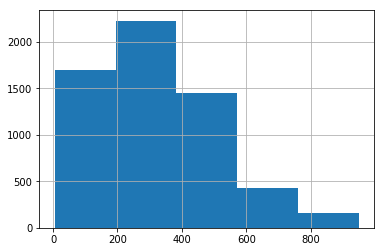

In [5]:
# Dividing the Fees bins 

dt['Fees'].hist(bins=5)
plt.show()

In [6]:
# Extracting Experience 

dt['Experience'] = dt['Experience'].str.split(" ").str[0]
dt['Experience']= dt['Experience'].astype(int)

In [6]:
# Missing Value check for Place

dt['Place'].isnull().sum()

25

In [7]:
# Filling empty values with unknown

dt['Place'].fillna('Unknown,Unknown',inplace=True)

In [8]:
# Splitting the string and extracting city and place

dt['Place']= dt['Place'].str.split(',')
dt['City'] = dt['Place'].str[-1]
dt['Place']= dt['Place'].str[0]

In [ ]:
# Missing Value check for  Rating 

dt['Rating'].isnull().sum()

3302

In [ ]:
# Replacing Rating null values with -99% and splitting into bins

dt['Rating'].fillna('-99%',inplace=True)
dt['Rating']= dt['Rating'].str[:-1]
dt['Rating']= dt['Rating'].astype(int)
bins=[-99,0,10,20,30,40,50,60,70,80,90,100]
labels=[i for i in range(11)]
dt['Rating']= pd.cut(dt['Rating'],bins=bins,labels=labels,include_lowest=True)

In [ ]:
# Counting the number of values for Rating and sorting 

dt['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [ ]:
# Extract relevant Qualification of doctors

dt["Qualification"]=dt["Qualification"].str.split(",")
Qualification={}
for x in dt["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]= Qualification[each]+1
        else:
            Qualification[each]=1

In [ ]:
# Top 10 most occuring qualifications in descending order

most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
most_qua


[('MBBS', 2808),
 ('BDS', 1363),
 ('BAMS', 764),
 ('BHMS', 749),
 ('MD - Dermatology', 606),
 ('MS - ENT', 411),
 ('Venereology & Leprosy', 297),
 ('MD - General Medicine', 285),
 ('Diploma in Otorhinolaryngology (DLO)', 250),
 ('MD - Homeopathy', 181)]

In [ ]:
# Appending the final qualifications with respect to most occuring qualifications

final_qua=[]
for tup in most_qua:
    final_qua.append(tup[0])
    
final_qua

['MBBS',
 'BDS',
 'BAMS',
 'BHMS',
 'MD - Dermatology',
 'MS - ENT',
 'Venereology & Leprosy',
 'MD - General Medicine',
 'Diploma in Otorhinolaryngology (DLO)',
 'MD - Homeopathy']

In [ ]:
for title in final_qua:
    dt[title]=0
    
for x,y in zip(dt["Qualification"].values,np.array([idx for idx in
                                                   range(len(dt))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            dt[q][y]=1
            
dt.drop("Qualification",axis=1,inplace=True)

In [ ]:
# Locating the index of e 

dt[dt['City']=='e'].index

In [ ]:
dt.head()

In [ ]:
# Null value check for Profile 

dt['Profile'].isnull().sum()

In [ ]:
# Value count for Profile
dt['Profile'].value_counts()

In [ ]:
# Value count for City

dt['City'].value_counts()

In [ ]:
dt[dt['City']=='e'].index

In [ ]:
# Value for City and Place

dt['City'][3980] = 'Unknown'
dt['Place'][3980] = 'Unknown'

In [ ]:
# Value count of city

dt['City'].value_counts()

In [ ]:
# Value count of place 

dt['Place'].value_counts()

In [ ]:
# dummy variables
dt = pd.get_dummies(dt,columns=['City','Profile'],prefix=['City','Profile'])
dt.head()

In [20]:
# null value check for miscellaneous info
dt['Miscellaneous_Info'].isnull().sum()

2620

In [21]:
dt.drop('Miscellaneous_Info',axis=1,inplace=True)

In [ ]:
ax=sns.lineplot(x=dt['Experience'],y=dt['Fees'],data=dt)
plt.show()

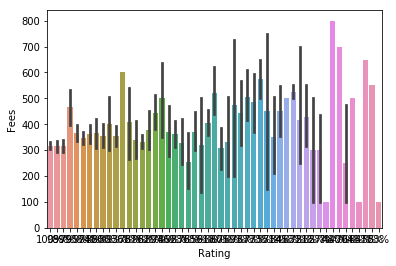

In [8]:
ax= sns.barplot(x=dt['Rating'],y=dt['Fees'],data=dt)
plt.show()

In [22]:
X = dt.drop(['Fees','Place'],axis=1)
y = dt['Fees']
print(X.shape)
print(y.shape)
print(y.dtype)

(5961, 4)
(5961,)
int64


In [23]:
X = pd.get_dummies(X)
X.head()

,Experience,Qualification_39 years experience,"Qualification_Advanced Certificate Course in Aesthetic Dentistry, BDS, Professional Implantology Training Course (PITC), FAGE- FELLOW, Comprehensive Course in Modern Endodontics","Qualification_Ayurvedic panchkarma, BAMS","Qualification_B.Ac, BEMS","Qualification_B.Sc, BAMS","Qualification_B.Sc, MBBS","Qualification_B.Sc, MBBS, DDVL, MD - Dermatology","Qualification_B.Sc, MBBS, Diploma in Otorhinolaryngology (DLO)","Qualification_B.Sc, MBBS, MD - General Medicine, Post Graduate Diploma in Diabetology (PGDD)",...,Rating_96%,Rating_97%,Rating_98%,Rating_99%,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4768, 1478)
(1193, 1478)
(4768,)
(1193,)


In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# Determining the intercept

print(lr.intercept_)

350335241953487.0


In [17]:

print(lr.coef_)

[-6.04919087e+00  2.93793354e+13  4.48437295e+13 ...  5.16210938e+00
  1.23217773e+01  1.52817933e+14]


In [18]:
pred=lr.predict(X_test)
pred=pd.DataFrame(pred,columns=['Predicted'])
pred

,Predicted
0,1.908750e+02
1,2.722500e+02
2,6.955564e+16
3,-2.629873e+16
4,2.157094e+17
5,-3.008795e+15
6,1.863750e+02
7,-1.101691e+17
8,2.582500e+02
9,2.310814e+16


In [19]:
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 5.8996595679469464e+16
Mean Squared Error: 1.040651702308172e+34
Root Mean Squared Error: 1.0201233760228083e+17
